In [3]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [5]:
import requests
from bs4 import BeautifulSoup

# **IMDB Movie** **reviews**

In [6]:
# Extracting the movie reviews from IMDB website

url = "http://www.imdb.com/title/tt3521164/reviews?ref_=tt_urv"
resp = requests.get(url)
print(resp.status_code)
#print(resp.content)
soup = BeautifulSoup(resp.text,"html.parser")
#soup.prettify()

200


In [7]:
reviews = soup.findAll("div", attrs={"class","text"})
print(type(reviews))
for i in range(len(reviews)):
    reviews[i] = reviews[i].text

<class 'bs4.element.ResultSet'>


In [8]:
# Creating a data frame 
import pandas as pd
movie_reviews = pd.DataFrame(reviews, columns = ["reviews"])
movie_reviews

,reviews
0,Instant classic.Easily ranks among the best fr...
1,"Wow, what a great great movie! The visuals in ..."
2,"Despite being a lifelong Disney fan, that is n..."
3,2016 has been a particularly strong year for a...
4,Moana is a return to the classic Disney formul...
5,"From the opening lyrics to the final shot, Moa..."
6,As an individual double majoring in Computer S...
7,"Like most adults, I came to view this film as ..."
8,I love everything about this movie. The colors...
9,It is indeed very rare that I toss a top ratin...


In [9]:
movie_reviews.shape

(25, 1)

In [10]:
import string 
import spacy
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
movie_reviews = [reviews.strip() for reviews in movie_reviews.reviews]

# **Preprocessing the text**

In [12]:
movie_reviews = [reviews for reviews in movie_reviews if reviews]           # removing the empty strings from the data
movie_reviews[0:25]

['Instant classic.Easily ranks among the best from the Disney Studio, and a very worthy successor to Mulan 1998, a similar story equally well done.Oddly also seems to be best work ever from Dwayne Johnson, perhaps not the first name I would have associated with "voice acting," but a star turn nonetheless.If you want to be picky -- which is the reviewer\'s job, after all -- the momentum slows a little at the top of the third act, but the ultimate themes of redemption, forgiveness and self-discovery at the finale are an absolute joy.As they used to say, "for children of all ages."((Designated "IMDb Top Reviewer." Please check out my list "167+ Nearly-Perfect Movies (with the occasional Anime or TV miniseries) you can/should see again and again (1932 to the present))',
 "Wow, what a great great movie! The visuals in this movie are breathtaking!! They are so gorgeous! But, besides the visuals there is such a heart and imagination and creativity to this movie. Moana is such a likable, smart

In [13]:
# joining the list of comments into a single text/string

text = ' '.join(movie_reviews)

In [14]:
len(text)

35721

**Removing punctuations**

In [15]:
no_punc_text = text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Instant classicEasily ranks among the best from the Disney Studio and a very worthy successor to Mulan 1998 a similar story equally well doneOddly also seems to be best work ever from Dwayne Johnson perhaps not the first name I would have associated with voice acting but a star turn nonethelessIf you want to be picky  which is the reviewers job after all  the momentum slows a little at the top of the third act but the ultimate themes of redemption forgiveness and selfdiscovery at the finale are an absolute joyAs they used to say for children of all agesDesignated IMDb Top Reviewer Please check out my list 167 NearlyPerfect Movies with the occasional Anime or TV miniseries you canshould see again and again 1932 to the present Wow what a great great movie The visuals in this movie are breathtaking They are so gorgeous But besides the visuals there is such a heart and imagination and creativity to this movie Moana is such a likable smart and relatable person the voice work for Moana is s

# **Tokenization**

In [17]:
import nltk
nltk.download()
from nltk.tokenize import word_tokenize

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
tokens = word_tokenize(no_punc_text)
tokens[0:25]

['Instant',
 'classicEasily',
 'ranks',
 'among',
 'the',
 'best',
 'from',
 'the',
 'Disney',
 'Studio',
 'and',
 'a',
 'very',
 'worthy',
 'successor',
 'to',
 'Mulan',
 '1998',
 'a',
 'similar',
 'story',
 'equally',
 'well',
 'doneOddly',
 'also']

In [21]:
len(tokens)

6202

**Removing Stopwords**

In [22]:
from nltk.corpus import stopwords
nltk.download('punkt')      
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
text_stopwords = stopwords.words("english")
text_stopwords.append('an')
no_stop_words = [word for word in tokens if not word in text_stopwords]
no_stop_words[:25]

['Instant',
 'classicEasily',
 'ranks',
 'among',
 'best',
 'Disney',
 'Studio',
 'worthy',
 'successor',
 'Mulan',
 '1998',
 'similar',
 'story',
 'equally',
 'well',
 'doneOddly',
 'also',
 'seems',
 'best',
 'work',
 'ever',
 'Dwayne',
 'Johnson',
 'perhaps',
 'first']

**Normalizing the text(converting all the text to lower case)**

In [24]:
lower_words = [text.lower() for text in no_stop_words]
lower_words[0:25]

['instant',
 'classiceasily',
 'ranks',
 'among',
 'best',
 'disney',
 'studio',
 'worthy',
 'successor',
 'mulan',
 '1998',
 'similar',
 'story',
 'equally',
 'well',
 'doneoddly',
 'also',
 'seems',
 'best',
 'work',
 'ever',
 'dwayne',
 'johnson',
 'perhaps',
 'first']

**Stemming**

In [25]:
from nltk.stem import PorterStemmer

In [26]:
ps = PorterStemmer()

In [27]:
stem_words = [ps.stem(word) for word in lower_words]
stem_words[0:25]

['instant',
 'classiceasili',
 'rank',
 'among',
 'best',
 'disney',
 'studio',
 'worthi',
 'successor',
 'mulan',
 '1998',
 'similar',
 'stori',
 'equal',
 'well',
 'doneoddli',
 'also',
 'seem',
 'best',
 'work',
 'ever',
 'dwayn',
 'johnson',
 'perhap',
 'first']

**Lemmatization**

In [49]:
!python3 -m spacy download en_core_web_sm

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-14 12:56:33.402847: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [50]:
nlp = spacy.load("en_core_web_sm")

In [51]:
# joining the stopwords into a paragraph

doc = nlp(' '.join(no_stop_words))
doc[0:25]

Instant classicEasily ranks among best Disney Studio worthy successor Mulan 1998 similar story equally well doneOddly also seems best work ever Dwayne Johnson perhaps first

In [52]:
lemmas = [token.lemma_ for token in doc]
lemmas[:25]

['instant',
 'classiceasily',
 'rank',
 'among',
 'good',
 'Disney',
 'Studio',
 'worthy',
 'successor',
 'Mulan',
 '1998',
 'similar',
 'story',
 'equally',
 'well',
 'doneoddly',
 'also',
 'seem',
 'good',
 'work',
 'ever',
 'Dwayne',
 'Johnson',
 'perhaps',
 'first']

**POS tagging**

In [53]:
one_block = movie_reviews[15]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [54]:
# getting the tokens and pos tags for the tokens

for tokens in doc_block[0:25]:
    print(tokens,tokens.pos_)

Moana PROPN
is AUX
my PRON
favorite ADJ
Disney PROPN
movie NOUN
& CCONJ
Disney PROPN
Princess PROPN
! PUNCT
I PRON
love VERB
the DET
animation NOUN
& CCONJ
the DET
beauty NOUN
of ADP
every DET
movement NOUN
. PUNCT
The DET
story NOUN
is AUX
empowering VERB


In [55]:
# extracting the nouns and verbs
noun_verbs = [token.text for token in doc_block if token.pos_ in ("NOUN","VERB")]
print(noun_verbs[0:25])

['movie', 'love', 'animation', 'beauty', 'movement', 'story', 'empowering', 'inspiring']


**# Getting the word count**

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(noun_verbs)
sum_words = X.sum(axis = 0)
word_freq = [(word, sum_words[0,idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
wf_df= pd.DataFrame(word_freq)
wf_df.columns = ['words', 'count']
wf_df[0:15]

,words,count
0,movie,1
1,love,1
2,animation,1
3,beauty,1
4,movement,1
5,story,1
6,empowering,1
7,inspiring,1


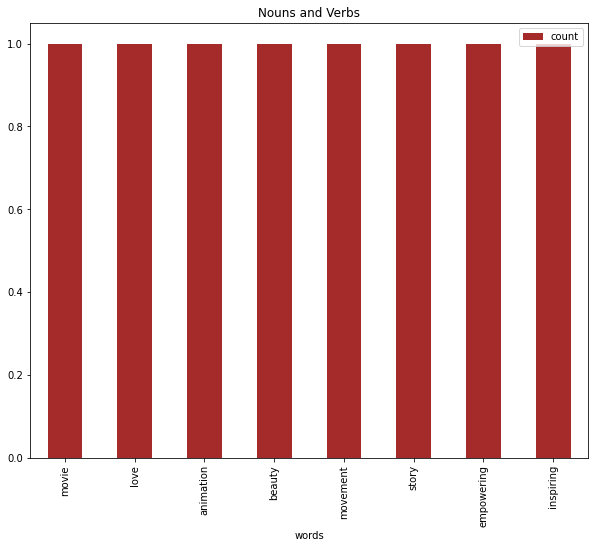

In [60]:
wf_df[0:10].plot.bar(x = 'words', title = 'Nouns and Verbs', figsize = (10,8),color = 'brown');

In [90]:
from google.colab import files

In [92]:
uploaded = files.upload()

Saving Afinn.csv to Afinn (2).csv


In [93]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Afinn.csv" with length 30582 bytes


In [94]:
uploaded

{'Afinn.csv': b"word,value\r\nabandon,-2\r\nabandoned,-2\r\nabandons,-2\r\nabducted,-2\r\nabduction,-2\r\nabductions,-2\r\nabhor,-3\r\nabhorred,-3\r\nabhorrent,-3\r\nabhors,-3\r\nabilities,2\r\nability,2\r\naboard,1\r\nabsentee,-1\r\nabsentees,-1\r\nabsolve,2\r\nabsolved,2\r\nabsolves,2\r\nabsolving,2\r\nabsorbed,1\r\nabuse,-3\r\nabused,-3\r\nabuses,-3\r\nabusive,-3\r\naccept,1\r\naccepted,1\r\naccepting,1\r\naccepts,1\r\naccident,-2\r\naccidental,-2\r\naccidentally,-2\r\naccidents,-2\r\naccomplish,2\r\naccomplished,2\r\naccomplishes,2\r\naccusation,-2\r\naccusations,-2\r\naccuse,-2\r\naccused,-2\r\naccuses,-2\r\naccusing,-2\r\nache,-2\r\nachievable,1\r\naching,-2\r\nacquit,2\r\nacquits,2\r\nacquitted,2\r\nacquitting,2\r\nacrimonious,-3\r\nactive,1\r\nadequate,1\r\nadmire,3\r\nadmired,3\r\nadmires,3\r\nadmiring,3\r\nadmit,-1\r\nadmits,-1\r\nadmitted,-1\r\nadmonish,-2\r\nadmonished,-2\r\nadopt,1\r\nadopts,1\r\nadorable,3\r\nadore,3\r\nadored,3\r\nadores,3\r\nadvanced,1\r\nadvantage,2\r\

In [95]:
import pandas as pd
import numpy as np

In [97]:
afinn = pd.read_csv('Afinn.csv', encoding='Latin-1')

In [99]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [100]:
afinn.shape

(2477, 2)

In [101]:
from itertools import islice

def take(n,iterable):
    return list(islice(iterable, n))

In [102]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [103]:
take(15,affinity_scores)

['abandon',
 'abandoned',
 'abandons',
 'abducted',
 'abduction',
 'abductions',
 'abhor',
 'abhorred',
 'abhorrent',
 'abhors',
 'abilities',
 'ability',
 'aboard',
 'absentee',
 'absentees']

In [104]:
from nltk import tokenize

In [105]:
sentence = tokenize.sent_tokenize(' '.join(movie_reviews))
sentence[5:15]

['But, besides the visuals there is such a heart and imagination and creativity to this movie.',
 'Moana is such a likable, smart, and relatable person.',
 'the voice work for Moana is so sweet and so good.',
 'The chemistry between Moana and Maui is so great and so natural.',
 'The songs in this movie are so charming, catchy and fun!',
 "But, How Far I'll Go is such an emotional song and it has such heart...I dare say I like it a little more than Let It Go!",
 'The way Moana sings it and you can feel it!!',
 'Wow, I just looved this movie and it is great for kids and adults.',
 'I will always love it and I wanna see it again!',
 "Despite being a lifelong Disney fan, that is not to say that everything they've done is great."]

In [106]:
sent_df = pd.DataFrame(sentence, columns = ['sentences'])
sent_df

,sentences
0,Instant classic.Easily ranks among the best fr...
1,"""((Designated ""IMDb Top Reviewer."""
2,"Please check out my list ""167+ Nearly-Perfect ..."
3,The visuals in this movie are breathtaking!!
4,They are so gorgeous!
...,...
301,I cannot say enough good things about this movie!
302,"Hi there,I'm not gonna say much other than tha..."
303,"Consequently, what follows is just a short opi..."
304,Pretty much everything; the animation here is ...


In [107]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

In [108]:
def calculate_sentiment(text: str = None)->float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [109]:
calculate_sentiment("never poor")

-2

In [110]:
# Getting the word count from sentences

sent_df['word_count'] = sent_df['sentences'].str.split().apply(len)
sent_df['word_count'].head(25)

0     102
1       4
2      31
3       7
4       4
5      16
6       9
7      11
8      12
9      11
10     27
11     10
12     14
13     11
14     17
15     20
16     40
17     63
18     25
19     34
20     46
21     71
22     17
23     27
24     16
Name: word_count, dtype: int64

In [111]:
sent_df['sentiment_scores'] = sent_df['sentences'].apply(calculate_sentiment)
sent_df

,sentences,word_count,sentiment_scores
0,Instant classic.Easily ranks among the best fr...,102,14
1,"""((Designated ""IMDb Top Reviewer.""",4,0
2,"Please check out my list ""167+ Nearly-Perfect ...",31,11
3,The visuals in this movie are breathtaking!!,7,0
4,They are so gorgeous!,4,0
...,...,...,...
301,I cannot say enough good things about this movie!,9,3
302,"Hi there,I'm not gonna say much other than tha...",26,2
303,"Consequently, what follows is just a short opi...",19,3
304,Pretty much everything; the animation here is ...,45,8


In [112]:
sent_df.sort_values(by = 'sentiment_scores').tail(20)

,sentences,word_count,sentiment_scores
127,"""Moana"" also has some good dialogue that keeps...",46,9
196,It won't be easy; life wasn't meant to be easy...,24,9
99,"In fact, I was astonished by its storyline alo...",67,9
151,She is voiced by Auli'I Cravaljo and it fits l...,16,9
93,It won't be easy; life wasn't meant to be easy...,24,9
159,"Moana has a great beginning, good middle, and ...",11,9
165,Moana is one of the best Disney films of the p...,30,9
84,"Even if they weren't slightly creative, the st...",33,10
116,Maui is also the perfect comic relief and the ...,33,10
45,I can easily see any one of the songs in this ...,31,10


In [113]:
sent_df['sentiment_scores'].describe()

count    306.000000
mean       2.303922
std        3.689922
min       -9.000000
25%        0.000000
50%        1.500000
75%        4.000000
max       25.000000
Name: sentiment_scores, dtype: float64

In [114]:
sent_df[sent_df['sentiment_scores']>=15]

,sentences,word_count,sentiment_scores
94,"It has a superb single, a nice accompanying so...",24,16
170,"Maui was one of the best modern Disney movies,...",69,25
197,"It has a superb single, a nice accompanying so...",24,16


In [115]:
sent_df[sent_df['sentiment_scores']<0]

,sentences,word_count,sentiment_scores
18,"It was however difficult to fault 'Moana', bec...",25,-1
19,There have been criticisms regarding a formula...,34,-9
28,"There is something for everybody, never too co...",26,-3
33,"If anybody does find him dumb or annoying, thi...",33,-7
38,It's no fluke that out of the four movies I ju...,38,-3
40,"Now, the world is slowly dying and someone mus...",19,-3
87,Just don't follow hard tradition all the time.,8,-1
95,"I admit, I was expecting too much from Moana a...",21,-1
106,"""All and all, I can't think of anything wrong ...",12,-2
113,Most films make a forced effort to show girls ...,19,-1


In [116]:
# Visualizing the sentiment scores

In [117]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

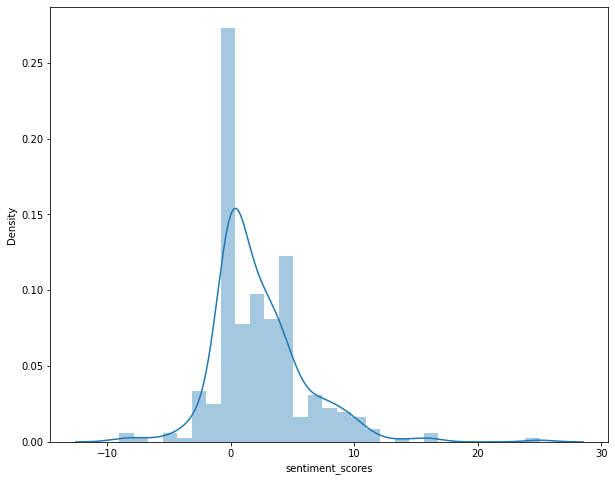

In [118]:
plt.figure(figsize = (10,8))
sns.distplot(sent_df['sentiment_scores'])

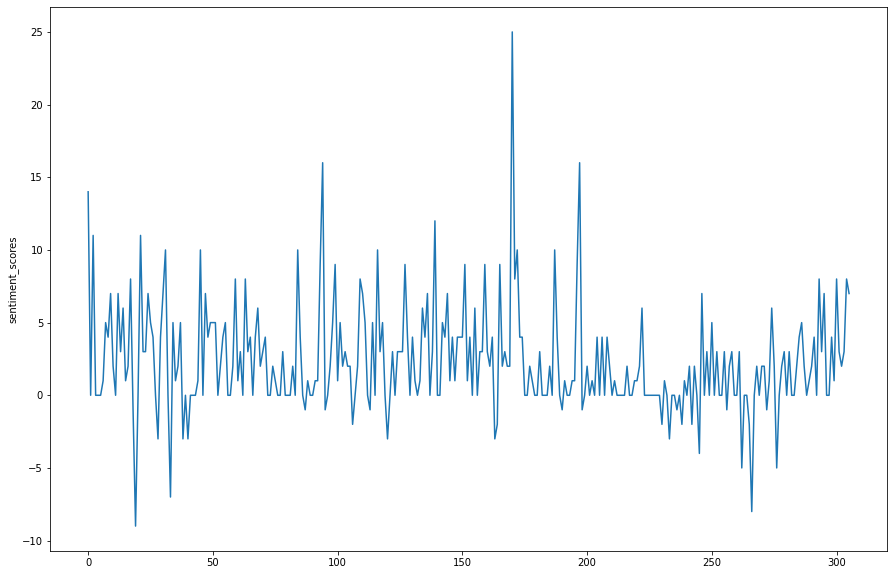

In [119]:
plt.figure(figsize=(15,10))
sns.lineplot(x = sent_df.index, y = sent_df['sentiment_scores'], data = sent_df)

In [120]:
string = " ".join(sent_df["sentences"])

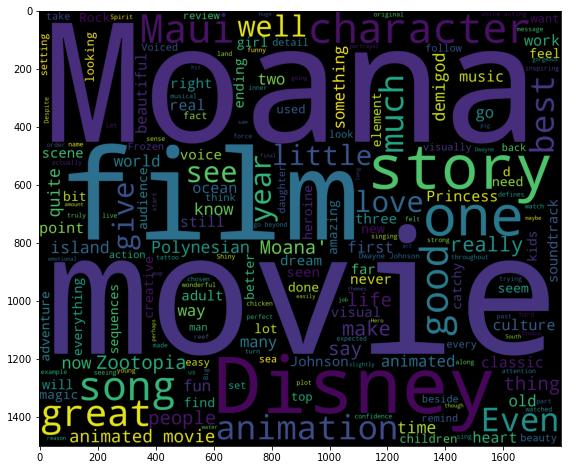

In [121]:
from wordcloud import WordCloud
plt.figure(figsize = (15,8))
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string)
plt.imshow(wordcloud_stw)